In [2]:
import pandas as pd

file = 'stem_schedule_spring.csv'
dataframe = pd.read_csv(file)

print(dataframe)

     Subj    Crs Sect                           Title       Start  \
0    BIOL  D006A  01Y  FORM/FUNCT IN THE BIOLGCL WRLD  04/10/2023   
1    BIOL  D006A  01Y  FORM/FUNCT IN THE BIOLGCL WRLD  04/10/2023   
2    BIOL  D006A  02Y  FORM/FUNCT IN THE BIOLGCL WRLD  04/10/2023   
3    BIOL  D006A  02Y  FORM/FUNCT IN THE BIOLGCL WRLD  04/10/2023   
4    BIOL  D006B  01Y        CELL & MOLECULAR BIOLOGY  04/10/2023   
..    ...    ...  ...                             ...         ...   
165  PHYS  D004C   40  PHYS SCI/ENG:FLUID/WAVOP/THERM  04/10/2023   
166  PHYS  D004C   40  PHYS SCI/ENG:FLUID/WAVOP/THERM  04/10/2023   
167  PHYS  D004D  01Y   PHYS SCIEN/ENG:MODERN PHYSICS  04/10/2023   
168  PHYS  D004D  01Y   PHYS SCIEN/ENG:MODERN PHYSICS  04/10/2023   
169  PHYS  D004D  01Y   PHYS SCIEN/ENG:MODERN PHYSICS  04/10/2023   

                  Time   Days    Room  
0                  TBA    TBA  ONLINE  
1    08:30 AM-11:20 AM    TTh  SC2108  
2                  TBA    TBA  ONLINE  
3    11:30 

In [17]:
# loading the columns we need

df = dataframe[['Time', 'Days', 'Title', 'Subj', 'Crs', 'Sect']]

df['Sect'][50:]

50      04
51      04
52      61
53      61
54      62
      ... 
165     40
166     40
167    01Y
168    01Y
169    01Y
Name: Sect, Length: 120, dtype: object

In [6]:
# this code will gather the unique times for each class and load them into a list

unique_times = set()

df['String_Time'] = df['Time'].astype(str)

unique_times = set()

for time_range in df['String_Time']:
    if time_range != 'TBA' and '-' in time_range: # skip 'TBA' entries and ensure there is a dash
        # The strip() function removes any leading/trailing whitespace
        cleaned_time_range = time_range.strip()
        # Add the cleaned time range to the set
        unique_times.add(cleaned_time_range)
        
sorted_unique_times = sorted(list(unique_times))

/var/folders/qs/kxz_m4m10b78vfjgbs36tjb40000gn/T/ipykernel_91485/1790256648.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['String_Time'] = df['Time'].astype(str)


In [8]:
# with sorted_unique_times we will look for overlaps with our data

# parse the sorted_unique_time_ranges list into a list of tuples
# each containing the start and end times as datetime.time objects
# compare each time range with every other time range to check for overlaps

from datetime import datetime, timedelta

# Function to parse a time range string into start and end datetime.time objects
def parse_time_range(time_range):
    start_str, end_str = time_range.split('-')
    start = datetime.strptime(start_str.strip(), '%I:%M %p').time()
    end = datetime.strptime(end_str.strip(), '%I:%M %p').time()
    return start, end

# Function to check if two time ranges overlap
def do_times_overlap(start1, end1, start2, end2):
    return max(start1, start2) < min(end1, end2)

def do_days_overlap(days1, days2):
    days1_set = set(days1)
    days2_set = set(days2)
    return any(day in days2_set for day in days1_set)

def calculate_overlap_duration(start1, end1, start2, end2):
    # ensure overlap
    if do_times_overlap(start1, end1, start2, end2):
        
        overlap_start = max(start1, start2)
        overlap_end = min(end1, end2)
        
        overlap_start_dt = datetime.combine(datetime.today(), overlap_start)
        overlap_end_dt = datetime.combine(datetime.today(), overlap_end)
        
        duration = (overlap_end_dt - overlap_start_dt).total_seconds() / 60
        return max(0, duration)
    else:
        return
    


parsed_time_ranges = [parse_time_range(time_range) for time_range in sorted_unique_times]

# Check for overlaps
overlaps = []
for i, time_range_1 in enumerate(parsed_time_ranges):
    for j, time_range_2 in enumerate(parsed_time_ranges):
        if i < j:  # Avoid comparing the same pair twice and comparing a range with itself
            start1, end1 = time_range_1
            start2, end2 = time_range_2
            if do_times_overlap(start1, end1, start2, end2):
                overlaps.append((sorted_unique_times[i], sorted_unique_times[j]))
                
                
class_info = [
    (row['Title'], row['Time'], row['Days'], row['Subj'], row['Crs'], row['Sect'])
    for _, row in df.iterrows()
    if row['Time'] != 'TBA' and row['Time'] != 'Time' and row['Subj'] != 'MATH' and row['Subj'] != 'PHYS' and not pd.isna(row['Title']) and not pd.isna(row['Time']) and not pd.isna(row['Days'])
]

for title1, time1, days1, subj1, crs1, sect1 in class_info:
    print(f" {title1}, {time1}, {days1}, {subj1}, {crs1}, {sect1}")


 FORM/FUNCT IN THE BIOLGCL WRLD, 08:30 AM-11:20 AM, TTh, BIOL, D006A, 01Y
 FORM/FUNCT IN THE BIOLGCL WRLD, 11:30 AM-02:20 PM, TTh, BIOL, D006A, 02Y
 CELL & MOLECULAR BIOLOGY, 09:30 AM-12:20 PM, MW, BIOL, D006B, 01Y
 CELL & MOLECULAR BIOLOGY, 12:30 PM-03:20 PM, MW, BIOL, D006B, 02Y
 ECOLOGY AND EVOLUTION, 09:30 AM-03:20 PM, T, BIOL, D006C, 01Y
 ECOLOGY AND EVOLUTION, 09:30 AM-03:20 PM, W, BIOL, D006C, 02Y
 ECOLOGY AND EVOLUTION, 09:30 AM-11:20 AM, TTh, BIOL, D006C, 03Y
 ECOLOGY AND EVOLUTION, 09:30 AM-12:20 PM, MW, BIOL, D006C, 03Y
 ECOLOGY AND EVOLUTION, 09:30 AM-11:20 AM, TTh, BIOL, D006C, 04Y
 ECOLOGY AND EVOLUTION, 01:30 PM-04:20 PM, MW, BIOL, D006C, 04Y
 ECOLOGY AND EVOLUTION, 12:30 PM-03:20 PM, MTh, BIOL, D006C, 05Y
 GENERAL CHEMISTRY, 12:30 PM-01:45 PM, MW, CHEM, D001A, 01Y
 GENERAL CHEMISTRY, 08:30 AM-11:20 AM, MW, CHEM, D001A, 01Y
 GENERAL CHEMISTRY, 12:30 PM-01:45 PM, MW, CHEM, D001A, 02Y
 GENERAL CHEMISTRY, 02:30 PM-05:20 PM, MW, CHEM, D001A, 02Y
 GENERAL CHEMISTRY, 11:30 AM-

In [10]:
# need to add logic for section

import itertools

title_overlaps = []
for (title1, time1, days1, subj1, crs1, sect1), (title2, time2, days2, subj2, crs2, sect2) in itertools.combinations(class_info, 2):
    if title1 == title2:
        continue
    if subj1 == subj2:
        continue
    if crs1 == crs2:
        continue
    if sect1 == sect2:
        continue
    start1, end1 = parse_time_range(time1)
    start2, end2 = parse_time_range(time2)
    # first check if the times overlap
    if do_times_overlap(start1, end1, start2, end2):
        # now check if the days overlap
        if do_days_overlap(days1, days2):
            calculated_duration = overlap_duration = calculate_overlap_duration(start1, end1, start2, end2)
            title_overlaps.append((title1, time1, days1, subj1, sect1, title2, time2, days2, subj2, sect2, calculated_duration))

counter = 0
for overlap in title_overlaps:
    print(f"{overlap[0]}, {overlap[1]} - overlaps - {overlap[5]}, {overlap[6]} - by - {overlap[10]}, minutes")
    counter += 1
    
print(f"There are a total of {counter} overlaps")

FORM/FUNCT IN THE BIOLGCL WRLD, 08:30 AM-11:20 AM - overlaps - GENERAL CHEMISTRY, 07:30 AM-10:20 AM - by - 110.0, minutes
FORM/FUNCT IN THE BIOLGCL WRLD, 08:30 AM-11:20 AM - overlaps - GENERAL CHEMISTRY, 10:30 AM-11:45 AM - by - 50.0, minutes
FORM/FUNCT IN THE BIOLGCL WRLD, 08:30 AM-11:20 AM - overlaps - GENERAL CHEMISTRY, 07:30 AM-10:20 AM - by - 110.0, minutes
FORM/FUNCT IN THE BIOLGCL WRLD, 11:30 AM-02:20 PM - overlaps - GENERAL CHEMISTRY, 11:30 AM-12:45 PM - by - 75.0, minutes
FORM/FUNCT IN THE BIOLGCL WRLD, 11:30 AM-02:20 PM - overlaps - GENERAL CHEMISTRY, 11:30 AM-12:45 PM - by - 75.0, minutes
FORM/FUNCT IN THE BIOLGCL WRLD, 11:30 AM-02:20 PM - overlaps - GENERAL CHEMISTRY, 10:30 AM-11:45 AM - by - 15.0, minutes
FORM/FUNCT IN THE BIOLGCL WRLD, 11:30 AM-02:20 PM - overlaps - GEN CHEM/QUAL ANALYSIS, 11:30 AM-02:20 PM - by - 170.0, minutes
CELL & MOLECULAR BIOLOGY, 09:30 AM-12:20 PM - overlaps - GENERAL CHEMISTRY, 11:30 AM-02:20 PM - by - 50.0, minutes
CELL & MOLECULAR BIOLOGY, 09:3

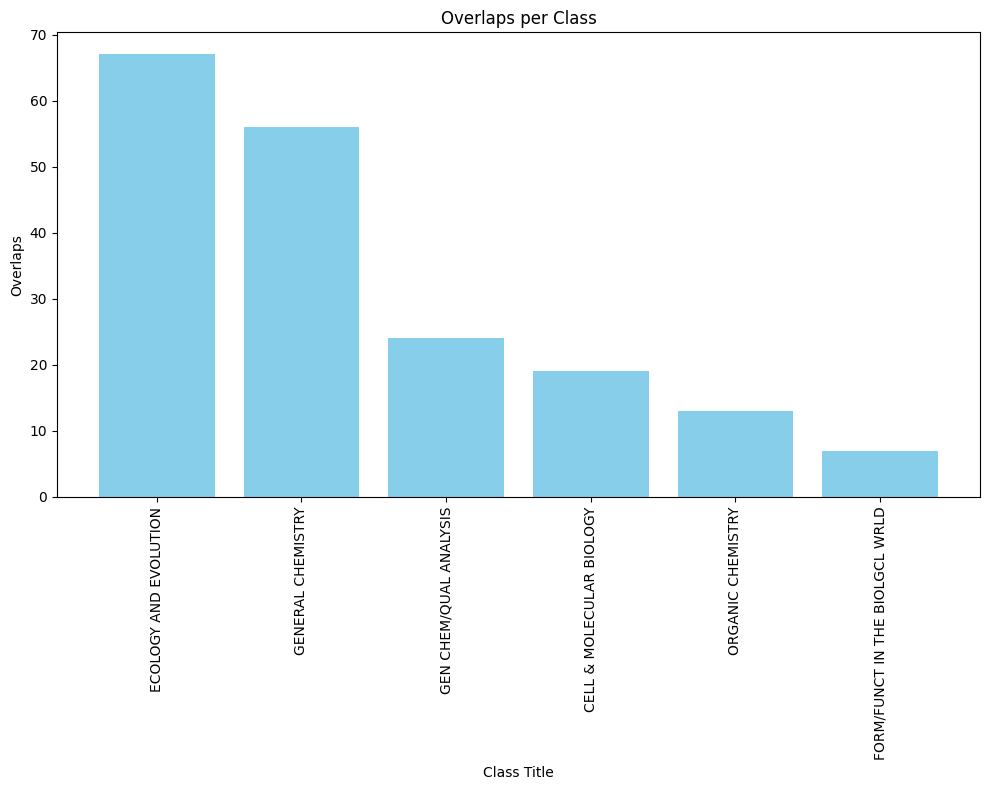

In [13]:
import matplotlib.pyplot as plt

# loading the amount of overlaps for each class title
overlap_count = {}

overlap_count = {}
for overlap in title_overlaps:
    overlap_count[overlap[0]] = overlap_count.get(overlap[0], 0) + 1
    overlap_count[overlap[5]] = overlap_count.get(overlap[5], 0) + 1

# Sort the titles by their overlap count
sorted_titles = sorted(overlap_count, key=overlap_count.get, reverse=True)
sorted_counts = [overlap_count[title] for title in sorted_titles]

plt.figure(figsize=(10, 8))
plt.bar(sorted_titles, sorted_counts, color="skyblue")

plt.title("Overlaps per Class")
plt.xlabel("Class Title")
plt.ylabel("Overlaps")

plt.xticks(rotation=90)

plt.tight_layout()
plt.show()